<Figure size 800x800 with 0 Axes>

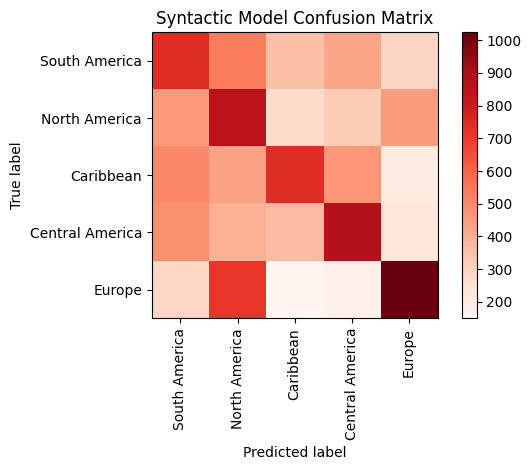

                 precision    recall  f1-score   support

  South America       0.30      0.32      0.31      2345
  North America       0.29      0.36      0.32      2345
      Caribbean       0.39      0.32      0.35      2345
Central America       0.39      0.37      0.38      2345
         Europe       0.47      0.44      0.45      2345

       accuracy                           0.36     11725
      macro avg       0.37      0.36      0.36     11725
   weighted avg       0.37      0.36      0.36     11725



In [4]:
#Generate confusion matrix and metrics
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


file_path = "lexical_test_predictions.tsv" #can switch out with lexical predictions tsv to get confusion model 
df = pd.read_csv(file_path, sep="\t")


y_true = df["true_region"]
y_pred = df["pred_region"]


regions = [
    "South America",
    "North America",
    "Caribbean",
    "Central America",
    "Europe"
]

cm = confusion_matrix(y_true, y_pred, labels=regions)

plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=regions)
disp.plot(cmap=plt.cm.Reds, xticks_rotation="vertical", values_format=None)
for txt in disp.text_.ravel():
    txt.set_visible(False)
plt.title("Syntactic Model Confusion Matrix")
plt.tight_layout()
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

print(classification_report(y_true, y_pred, labels=regions, zero_division=0)) #metrics